# Thera Banking Personal Loan Campaign
Project Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans

### Question 1:import the dataset and libraries, check datatype, statistical summary, shape, null values of incorrect Imputation

###### a) Import Libraries

In [188]:
import warnings

import numpy as np
import pandas as pd 
from pandas import Series, DataFrame


from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

from math import sqrt


%matplotlib inline
warnings.filterwarnings("ignore")



###### b) Import the dataset

In [71]:
df = pd.read_csv("C:\\Users\isaac\csv/Bank_Personal_Loan_Modelling.csv")

In [72]:
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [73]:
df.info

<bound method DataFrame.info of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Onli

In [74]:
# rename the columns header
df.rename(columns={"ID":"id","Age":"age","Experience":"exp","Income":"income","ZIP Code":"zip","Family":"family",
                  "CCAvg":"ccavg","Education":"edu","Mortgage":"mortgage","Personal Loan":"loan",
                   "Securities Account":"sec_acc","CD Account":"cd_acc","Online":"online","CreditCard":"credit"},
                    inplace=True)

In [75]:
df.columns

Index(['id', 'age', 'exp', 'income', 'zip', 'family', 'ccavg', 'edu',
       'mortgage', 'loan', 'sec_acc', 'cd_acc', 'online', 'credit'],
      dtype='object')

###### c) Check datatype

In [76]:
df.dtypes

id            int64
age           int64
exp           int64
income        int64
zip           int64
family        int64
ccavg       float64
edu           int64
mortgage      int64
loan          int64
sec_acc       int64
cd_acc        int64
online        int64
credit        int64
dtype: object

Observation: 

1. All the variable are integer and 1 floating data type. but note the "edu" and "family" variable should be categorical

2. "loan","sec_acc","cd_acc","online" and "credit" into boolean variable, for computation, as long as they appear as 0 & 1. we leave them like that

In [77]:
# Convert the "edu" and "family" variable from integer to categorical and int to boolean
df["family"]=df["family"].astype("category")
df["edu"]=df["edu"].astype("category")
df["loan"]=df["loan"].astype("boolean")
df["sec_acc"]=df["sec_acc"].astype("boolean")
df["cd_acc"]=df["cd_acc"].astype("boolean")
df["online"]=df["online"].astype("boolean")
df["credit"]=df["credit"].astype("boolean")

In [78]:
df.dtypes

id             int64
age            int64
exp            int64
income         int64
zip            int64
family      category
ccavg        float64
edu         category
mortgage       int64
loan         boolean
sec_acc      boolean
cd_acc       boolean
online       boolean
credit       boolean
dtype: object

Observation:
    
    1. "int","age","exp","income" are integer data type
    2. "family" & "edu" are categorical data type
    3. "loan","sec_acc","cd_acc", "online","credit" are boolean data type
    4. We shall drop "id" and "zip" code they are not relevant to the dataset

In [79]:
# droping irrevleant columns "id" and 'zip'
df=df.drop(columns={"id","zip"}, axis = 1 )

###### d) shape of the dataset

In [80]:
df.shape

(5000, 12)

In [81]:
print("No of rows :",df.shape[0])

No of rows : 5000


In [82]:
print("No of columns :",df.shape[1])

No of columns : 12


###### e) Null Values or Incorrect imputation

In [83]:
df.isna().sum()

age         0
exp         0
income      0
family      0
ccavg       0
edu         0
mortgage    0
loan        0
sec_acc     0
cd_acc      0
online      0
credit      0
dtype: int64

 observation:
    1. No null values

In [84]:
# check for duplicate
df.duplicated().sum()

13

 Observation:
    1. 13 duplicated row was captured

In [85]:
# Lets view this duplicates
df.loc[df.duplicated(),:] #view the duplicates

,age,exp,income,family,ccavg,edu,mortgage,loan,sec_acc,cd_acc,online,credit
799,29,3,39,4,2.10,3,0,False,False,False,True,False
1026,28,4,43,3,0.10,2,0,False,False,False,True,False
1526,36,10,80,4,2.20,2,0,False,False,False,True,False
2031,60,35,80,3,0.50,1,0,False,False,False,True,False
2806,53,27,59,2,0.80,3,0,False,False,False,True,False
3050,50,25,58,1,1.30,2,0,False,False,False,True,False
3453,29,3,31,4,0.30,2,0,False,False,False,True,False
3694,38,8,21,1,0.67,3,0,False,False,False,True,False
4058,39,15,65,1,1.50,3,0,False,False,False,False,False
4482,40,14,28,2,0.80,3,0,False,False,False,False,False


In [86]:
#lets drop this duplicated row from the dataFrame
df=df.drop_duplicates(keep="first",) #drop the duplicates and update the dataset
print("shape:",df.shape)
print("No of rows :",df.shape[0])
print("No of columns:",df.shape[1])

shape: (4987, 12)
No of rows : 4987
No of columns: 12


###### f) Statistical summary


In [87]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,4987.0,45.35,11.46,23.0,35.0,45.0,55.0,67.0
exp,4987.0,20.11,11.46,-3.0,10.0,20.0,30.0,43.0
income,4987.0,73.82,46.06,8.0,39.0,64.0,98.0,224.0
ccavg,4987.0,1.94,1.75,0.0,0.7,1.5,2.6,10.0
mortgage,4987.0,56.65,101.81,0.0,0.0,0.0,101.0,635.0


In [88]:
df.describe(include="category").T.round(2) # to view all the columns

,count,unique,top,freq
family,4987,4,1,1467
edu,4987,3,1,2095


In [89]:
df.describe(include="boolean").T.round(2) # to view all the columns

,count,unique,top,freq
loan,4987,2,False,4507
sec_acc,4987,2,False,4465
cd_acc,4987,2,False,4685
online,4987,2,True,2973
credit,4987,2,False,3518


In [90]:
df.describe(include="all").T.round(2) # to view all the columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4987,NaN,NaN,NaN,45.3477,11.4608,23,35,45,55,67
exp,4987,NaN,NaN,NaN,20.1145,11.4649,-3,10,20,30,43
income,4987,NaN,NaN,NaN,73.8245,46.0627,8,39,64,98,224
family,4987,4,1,1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ccavg,4987,NaN,NaN,NaN,1.94063,1.74882,0,0.7,1.5,2.6,10
edu,4987,3,1,2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mortgage,4987,NaN,NaN,NaN,56.6461,101.805,0,0,0,101,635
loan,4987,2,False,4507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec_acc,4987,2,False,4465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cd_acc,4987,2,False,4685,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 2:EDA, Study the data distribution in each attribute and target variable, share your findings
a). Number of Unique in each column?

b). Number of people with Zero Mortgage?

c). Number of people with zero credit card spending per month

d). Value counts of all categorical columns

e). Univariate and Bivariate

e). Get data model ready

###### a). No of Unique in each column

In [91]:
# No of Unique in each column
df.nunique()

age          45
exp          47
income      162
family        4
ccavg       108
edu           3
mortgage    347
loan          2
sec_acc       2
cd_acc        2
online        2
credit        2
dtype: int64

# Observation:

1. "Age" has 45 unique values
2. "Experience" has 47 unique values
3. "Income" has 162 Unique values
4. "Family" has 4 unique values
5. "ccavg" has 108 unique values
6. "Edu" has 3 unique values
7. "Mortgage" has 347 unique values
8. "Loan" has 2 unique values
9. "Sec_acc" has 2 unique values
10. "cd_acc" has 2 unique values
11. "online" has 2 unique values
12. "credit" has 2 unique values

###### b) Number of people with Zero Mortgage?

In [92]:
print("Number of people with Zero Mortgage :",df.mortgage[df.mortgage==0].count(),
       "Percentage" ,df.mortgage[df.mortgage==0].count()*100/df["mortgage"].count(),"%")

Number of people with Zero Mortgage : 3449 Percentage 69.15981552035292 %


Observation:
1. 3462 bank customer, representing 69.16% has zero mortgage

###### c). Number of people with zero credit card spending per month¶

In [93]:
print("Number of people with zero credit card spending per month :",df.credit [df.ccavg ==0].count(),
     "Percentage:",df.credit [df.ccavg ==0].count()*100/df["ccavg"].count(),"%")

Number of people with zero credit card spending per month : 106 Percentage: 2.1255263685582513 %


Observation:
1. 106 Customers has zero credit card spending per month, which represent 2.13%

###### d). Value Count for each categorical column
There are only 2 (two) categorical column ie "family" and "edu"

In [94]:
display("Family size Categorical variable Count and Percentage:",df["family"].value_counts().sort_index(),
      df["family"].value_counts().sort_index()*100/df["family"].count())

'Family size Categorical variable Count and Percentage:'

1    1467
2    1294
3    1007
4    1219
Name: family, dtype: int64

1    29.416483
2    25.947463
3    20.192501
4    24.443553
Name: family, dtype: float64

Observation:

1. 1472 customers, representing 29.42% have a family size of 1
2. 1296 customers, representing 25.95% have a family size of 2
3. 1010 customers, representing 20.19% have a famiy size of 3
4. 24.44 customers, representing 24.44% have a famiy size of 4

###### e). Univerated and Biverated¶

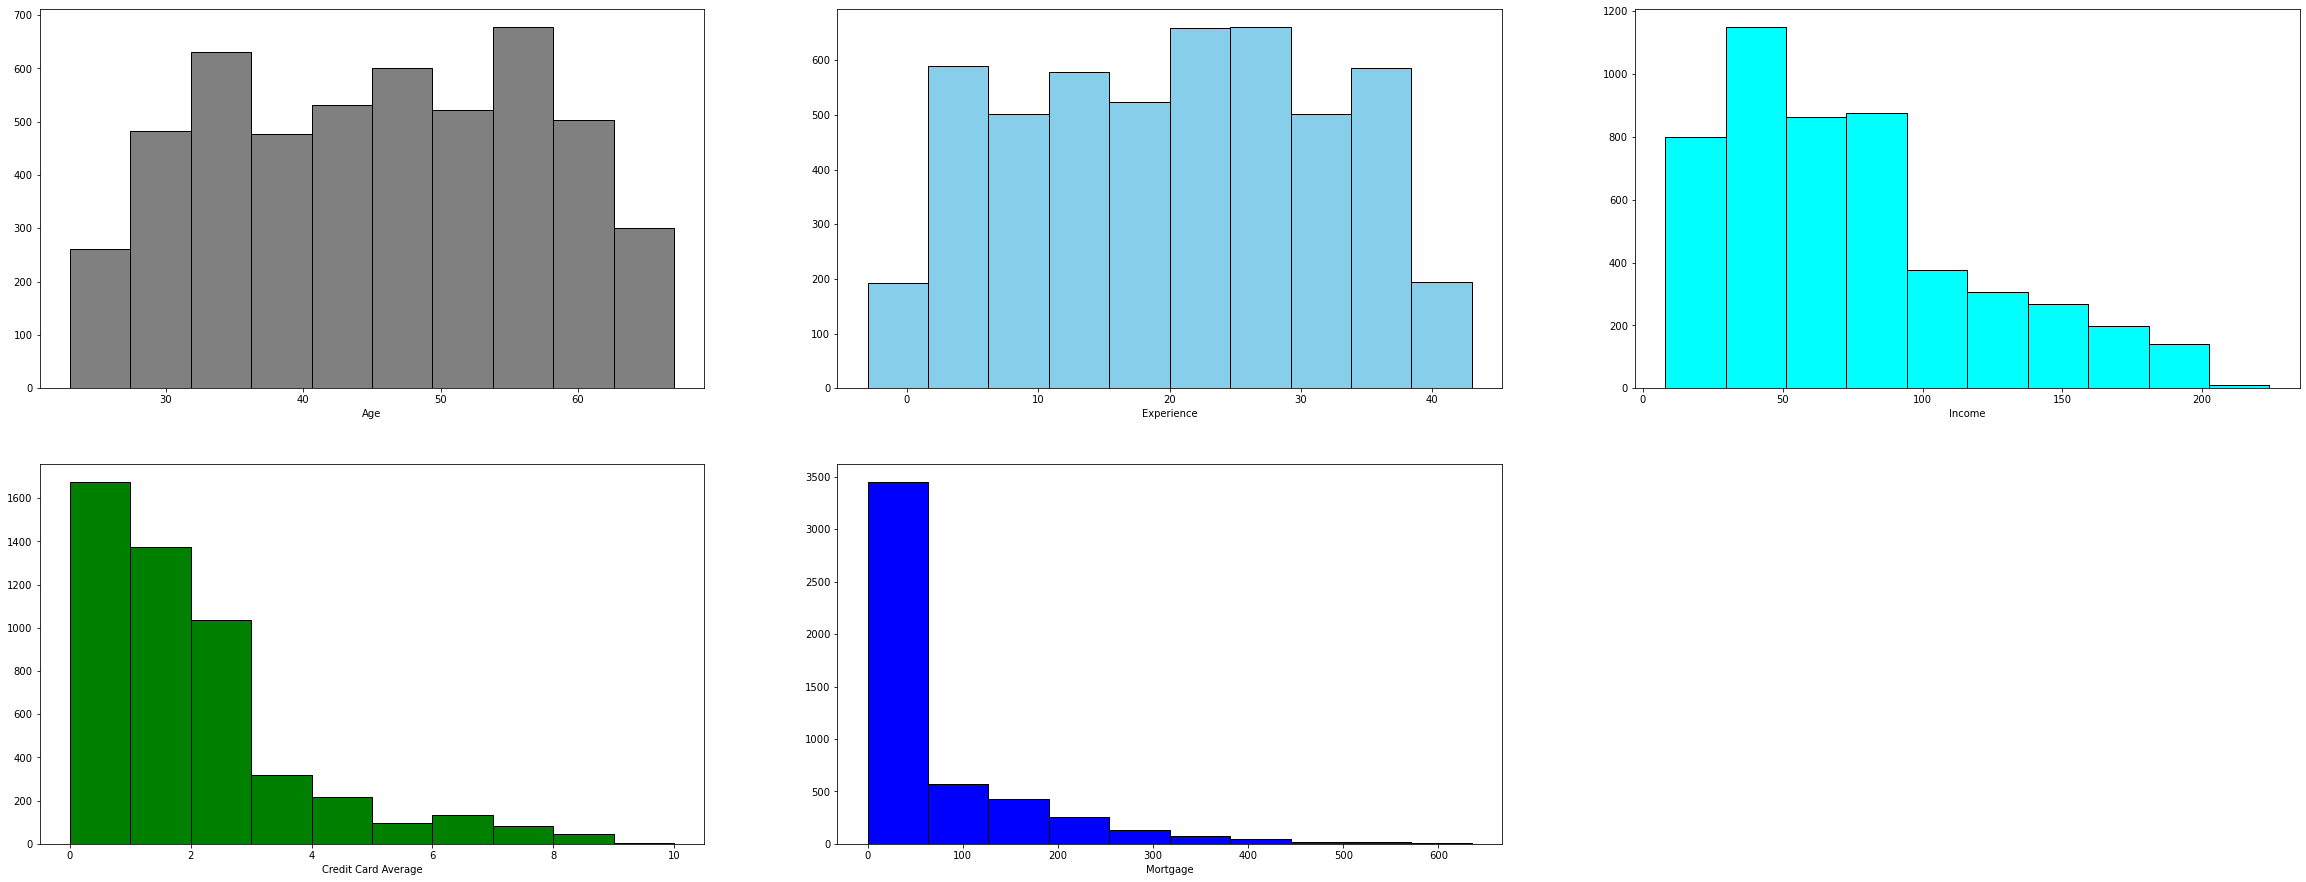

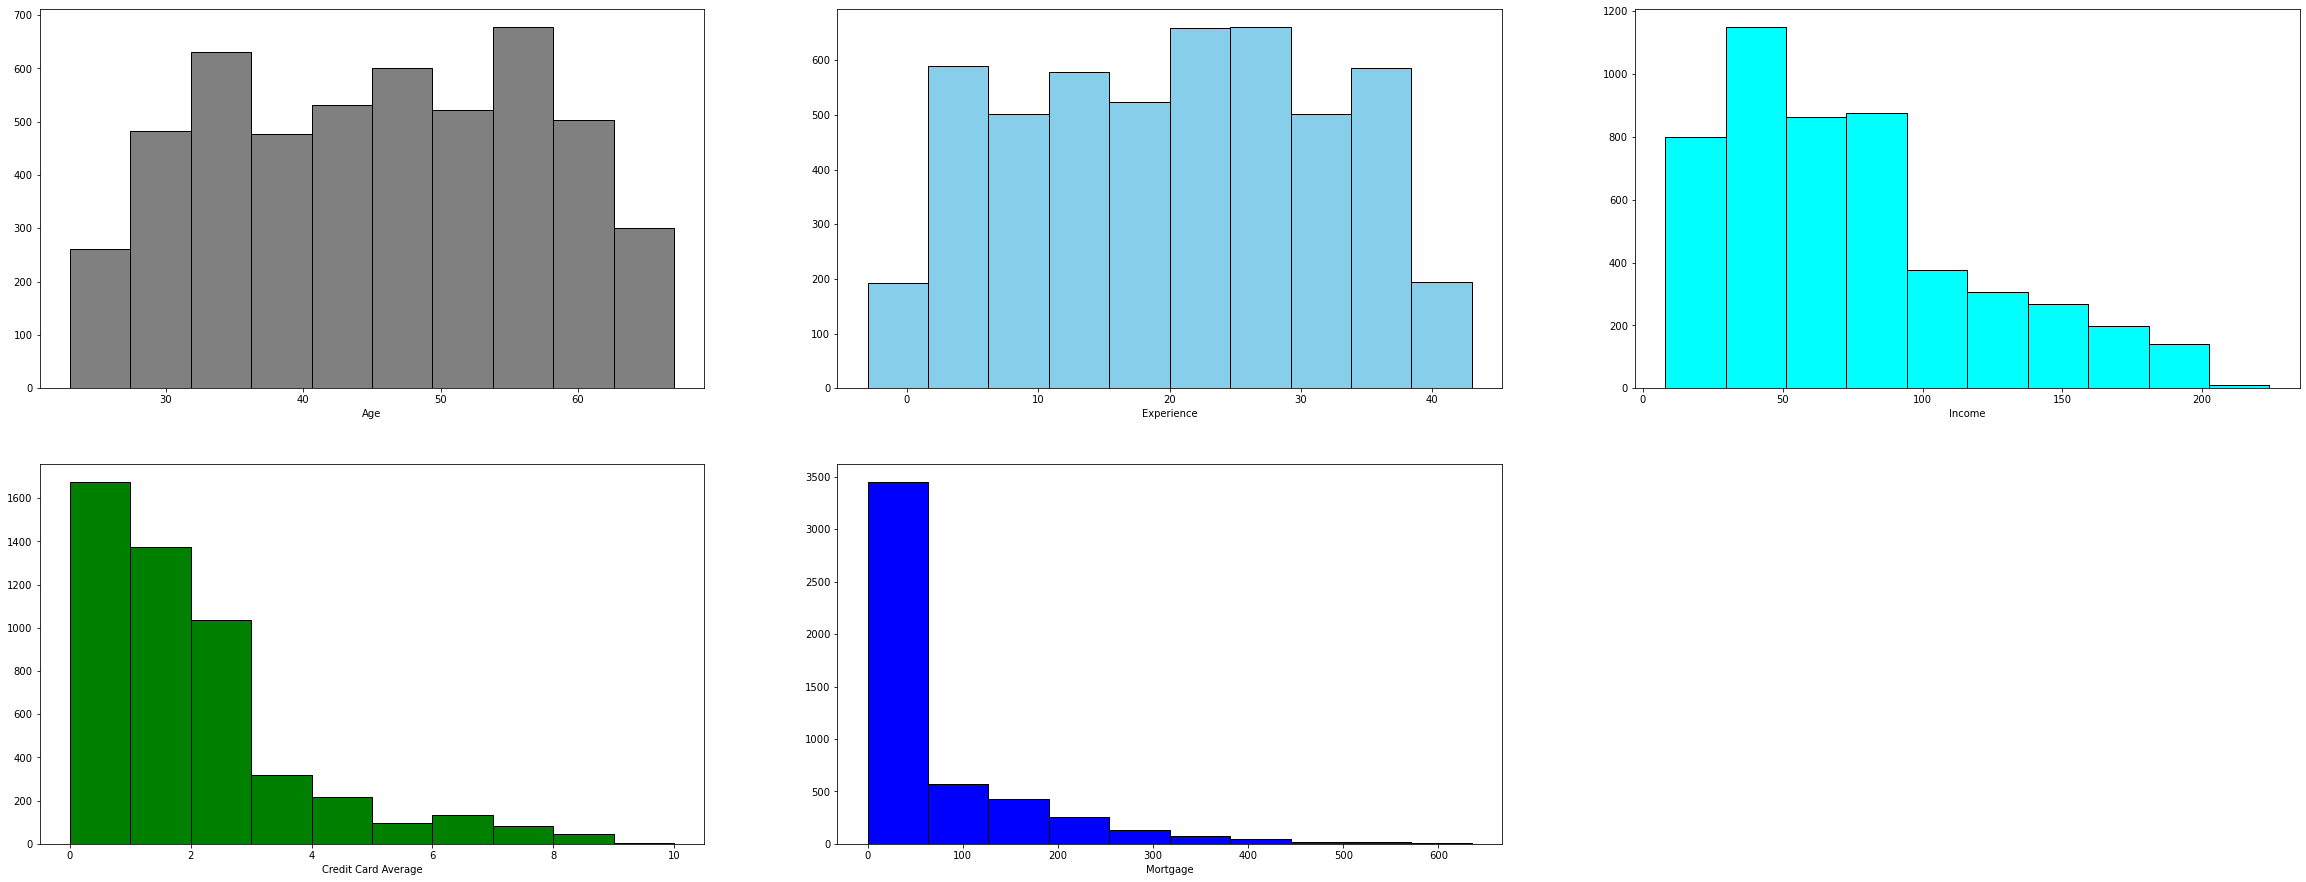

In [95]:
# Univariate Analysis of the continous variables
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.age, color='gray', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.exp, color='skyblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.income, color='cyan', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.ccavg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.mortgage, color='blue', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()# Univariate Analysis of the continous variables
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.age, color='gray', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.exp, color='skyblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.income, color='cyan', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.ccavg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.mortgage, color='blue', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

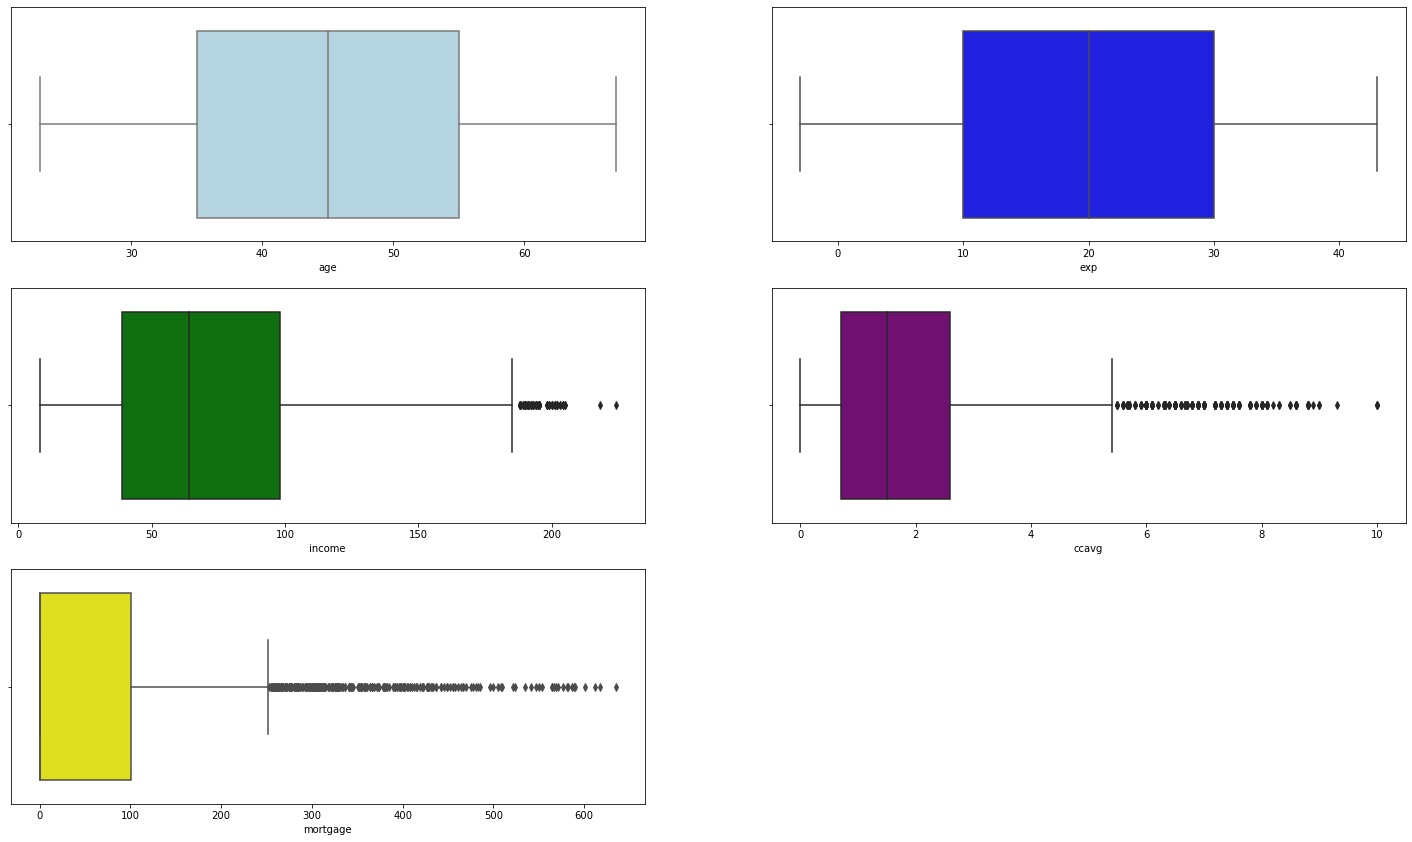

In [96]:
# Univariate Analysis of the continous variables - boxplot
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= df.exp, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df.ccavg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= df.mortgage, color='yellow')

In [97]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
age,4987.0,45.0,11.0,23.0,35.0,45.0,55.0,67.0
exp,4987.0,20.0,11.0,-3.0,10.0,20.0,30.0,43.0
income,4987.0,74.0,46.0,8.0,39.0,64.0,98.0,224.0
ccavg,4987.0,2.0,2.0,0.0,1.0,2.0,3.0,10.0
mortgage,4987.0,57.0,102.0,0.0,0.0,0.0,101.0,635.0


In [98]:
# Univerate analysis for age
df.describe().T.loc[["age",]].round(2)

,count,mean,std,min,25%,50%,75%,max
age,4987.0,45.35,11.46,23.0,35.0,45.0,55.0,67.0


Text(0.5, 1.0, 'Age Distribution')

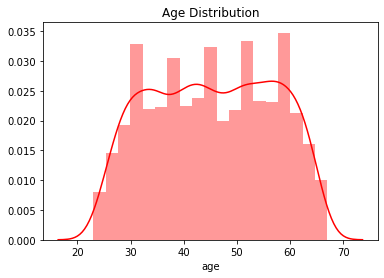

In [99]:
# Age data distribution
sns.distplot(df.age,color="red")
plt.title("Age Distribution")

 Observation:
1. No of Observation: 4987
2. Mean value of Age:45.34
3. Standard Deviation of Age: 11.46
4. Minimum age of customer: 23 years
5. Maximum age of custiner: 67 year
6. 25% Percentile: 35
7. 50% Percentile: 45
8. 75% Percentile: 55
9. Age is a Integer variable
10. Age is highly correlated with Experience.
11. The curve is slightly negatively skewed:-0.029341

In [100]:
# Univerate analysis for experience
df.describe().T.loc[["exp",]].round(2)

,count,mean,std,min,25%,50%,75%,max
exp,4987.0,20.11,11.46,-3.0,10.0,20.0,30.0,43.0


Text(0.5, 1.0, 'Experience Distribution')

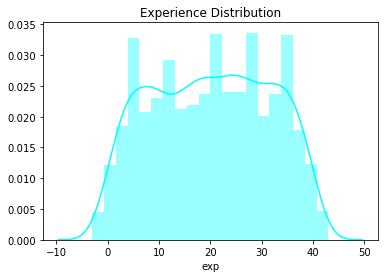

In [32]:
# Experience data distribution
sns.distplot(df.exp,rug=False,hist=True,kde=True,color="cyan")
plt.title("Experience Distribution")

 Observation:

1. No of Observation: 4987
2. Mean value of Experience:20.11
3. Standard Deviation of Experience: 11.46
4. Minimum Experience of customer: -3yrs
5. Maximum Experience of custiner: 43 yrs
6. 25% Percentile: 10
7. 50% Percentile: 20
8. 75% Percentile: 30
9. Experience is a Integer variable
10. Experience is highly correlated with Age.
11. The curve is slightly negatively skewed:-0.026325

In [101]:
# Univerate analysis for Income
df.describe().T.loc[["income",]].round(2)

,count,mean,std,min,25%,50%,75%,max
income,4987.0,73.82,46.06,8.0,39.0,64.0,98.0,224.0


Text(0.5, 1.0, 'Income Distribution')

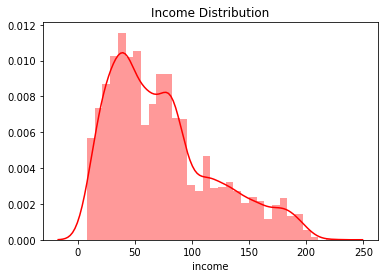

In [102]:
# Income data distribution
sns.distplot(df.income,rug=False,hist=True,kde=True,color="red")
plt.title("Income Distribution")

Observation:
1. Income is a numerical variable
2. Observation: 4987
3. mean: 73.82
4. Std : 46:06
5. minimum income ($000): 8

6. Maximum income ($000): 224
7. 25% Percentile :39
8. 50% Percentile(average): 64
9. 75% Percentile : 98
10. The Curve is moderately Skewed (Skewness = 0.8413386073)

In [103]:
# Univariate analysis for Average spending on credit card
df.describe().T.loc[["ccavg",]].round(2)

,count,mean,std,min,25%,50%,75%,max
ccavg,4987.0,1.94,1.75,0.0,0.7,1.5,2.6,10.0


Text(0.5, 1.0, 'Average Spending on credit Card')

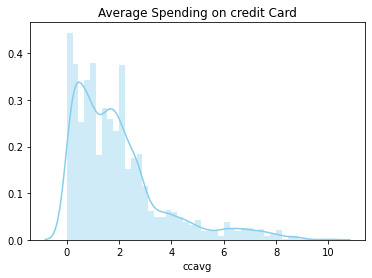

In [104]:
# Average spending on credit card per month data distribution
sns.distplot(df.ccavg,rug=False,hist=True,kde=True,color="skyblue")
plt.title("Average Spending on credit Card")

Observation:
1. Observation: 4987
2. ccavg(average spend on credit card per month), numeric variable
3. mean: 1.94 
4. Std : 1.75
5. Minmum ccavg per month: 0.0 ($000)

6. Maximum ccavg per month: 10.0 ($000)
7. 25% Percentile: 0.7
8. 50% Percentile (average): 1.5
9. 75% Percentile: 2.5
10.The curve is highly positive skewed (skewness = 1.598443337)

In [105]:
#Univeriate analysis on mortgage
df.describe().T.loc[["mortgage",]].round(2)

,count,mean,std,min,25%,50%,75%,max
mortgage,4987.0,56.65,101.81,0.0,0.0,0.0,101.0,635.0


Text(0.5, 1.0, 'Mortgage Distribution')

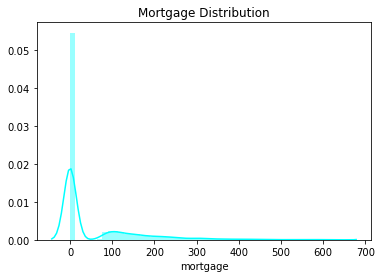

In [38]:
# Mortgage data distribution
sns.distplot(df.mortgage,rug=False,hist=True,kde=True,color="cyan")
plt.title("Mortgage Distribution")

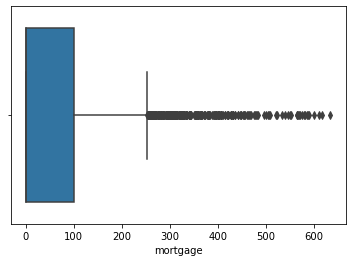

In [106]:
# Outliers present in mortgage
import seaborn as sns     # library for advance visualization
sns.boxplot(x=df['mortgage'])   # box plot

Observation:

1. Observation: 4987
2. Mortgage, numeric variable
3. mean: 56.65
4. std : 101.81
5. The minmum Mortgage ( 000)=0
6. 𝑇ℎ𝑒𝑀𝑎𝑥𝑖𝑚𝑢𝑚𝑀𝑜𝑟𝑡𝑔𝑎𝑔𝑒( 000) = 635
7. 25% Percentile : 0
8. 50% Percentile : 0
9. 75% Percentile : 101
10. The curve is highly positively skewed (Skewness = 2.104002319)
11. Many outliers are present (Kurtosis = 4.756796669)

In [107]:
# Univerate analysis for the personal loan
display("Personnel Loan variable Count and Percentage:",df["loan"].value_counts().sort_index(),
        df["loan"].value_counts().sort_index()*100/df["loan"].count())

'Personnel Loan variable Count and Percentage:'

False    4507
True      480
Name: loan, dtype: Int64

False    90.374975
True      9.625025
Name: loan, dtype: float64

In [108]:
df.loan.value_counts().to_frame()

,loan
False,4507
True,480


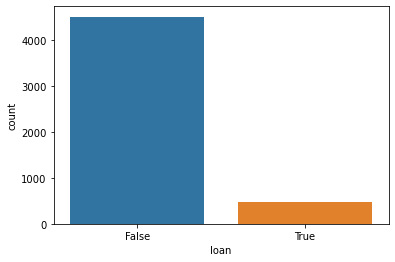

In [42]:
sns.countplot(df["loan"])

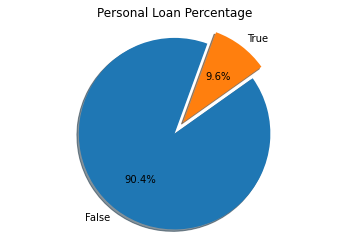

In [109]:
source_counts =pd.DataFrame(df["loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Personal Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

Observation:
1. observation: 4987
2. Loan is a boolean variable 
3. 4507 customers, representing 90.4% of the bank customer did not access the personal loan
4. 480 customers, representing 9.6% of the bank customer did accessed the the personal loan
5. Loan is the dependant variable in the dataset

In [110]:
# Univariate analysis for credit card
display("Credit card variable Count and Percentage:",df["credit"].value_counts().sort_index(),
        df["credit"].value_counts().sort_index()*100/df["credit"].count())

'Credit card variable Count and Percentage:'

False    3518
True     1469
Name: credit, dtype: Int64

False    70.543413
True     29.456587
Name: credit, dtype: float64

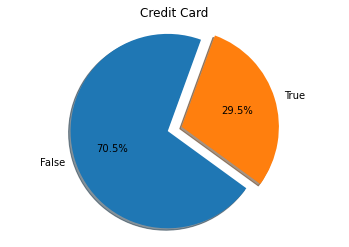

In [111]:
source_counts =pd.DataFrame(df["credit"].value_counts()).reset_index()
source_counts.columns =["Labels","Credit Card"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Credit Card"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Credit Card")
plt.show()

Observation:
1. No of observation: 4987
2. Credit is a boolean variable
3. 3518 customers, representing 70.5% of the bank customer do not have credit card with the bank
4. 1469 customers, representing 29.5% of the bank customer have credit card

In [112]:
# Univariate analysis for credit card spending avarage
display("Customers with Security Account Vs Those Without:",df["sec_acc"].value_counts().sort_index(),
        df["sec_acc"].value_counts().sort_index()*100/df["sec_acc"].count())

'Customers with Security Account Vs Those Without:'

False    4465
True      522
Name: sec_acc, dtype: Int64

False    89.532785
True     10.467215
Name: sec_acc, dtype: float64

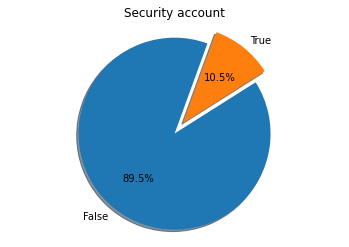

In [113]:
source_counts =pd.DataFrame(df["sec_acc"].value_counts()).reset_index()
source_counts.columns =["Labels","Security account"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Security account"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Security account")
plt.show()

Observation
1. No of observation: 4987
2. sec_acc is a boolean variable
3. 4465 customers, representing 89.5% of the bank customer do not have Security Account
4. 552 customers, representing 10.5% of the bank customer have Security account with the bank

In [114]:
# Univariate analysis for credit card account
display("No of Customers with Credit Card Account Vs those without:",df["cd_acc"].value_counts().sort_index(),
        df["cd_acc"].value_counts().sort_index()*100/df["cd_acc"].count())

'No of Customers with Credit Card Account Vs those without:'

False    4685
True      302
Name: cd_acc, dtype: Int64

False    93.944255
True      6.055745
Name: cd_acc, dtype: float64

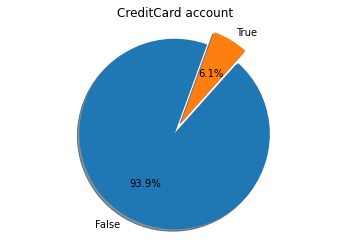

In [115]:
source_counts =pd.DataFrame(df["cd_acc"].value_counts()).reset_index()
source_counts.columns =["Labels","CreditCard account"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["CreditCard account"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("CreditCard account")
plt.show()

 Observation

1. No of observation: 4987
2. cd_acc is a boolean variable
3. 4685 customers, representing 93.9% of the bank customer do not have Credit Card Account
4. 302 customers, representing 6.1% of the bank customer have credit Card account

In [116]:
# Univariate analysis for Online banking 
display("No of Customers with online Banking Vs those without:",df["online"].value_counts().sort_index(),
        df["online"].value_counts().sort_index()*100/df["online"].count())

'No of Customers with online Banking Vs those without:'

False    2014
True     2973
Name: online, dtype: Int64

False    40.385001
True     59.614999
Name: online, dtype: float64

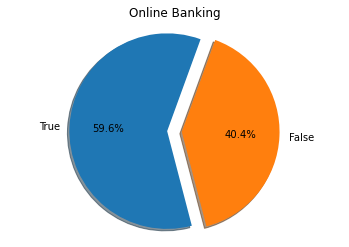

In [117]:
source_counts =pd.DataFrame(df["online"].value_counts()).reset_index()
source_counts.columns =["Labels","Online Banking"]
source_counts

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Online Banking"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Online Banking")
plt.show()

Observation

1. No of observation: 4987
2. online is a boolean variable
3. 2014 customers, representing 40.4% of the bank customer do not have Online banking
4. 2973 customers, representing 59.6% of the bank customer have Online banking

In [118]:
# Univariate analysis on the family
display("Family distribution:",df["family"].value_counts().sort_index(),
        df["family"].value_counts().sort_index()*100/df["family"].count())

'Family distribution:'

1    1467
2    1294
3    1007
4    1219
Name: family, dtype: int64

1    29.416483
2    25.947463
3    20.192501
4    24.443553
Name: family, dtype: float64

Text(0.5, 0, 'Family Size')

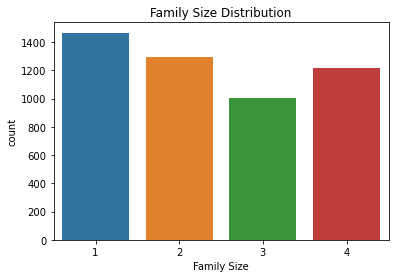

In [119]:
sns.countplot(df["family"])
plt.title("Family Size Distribution")
plt.xlabel("Family Size")

Observation:
    1. observation: 4987
    2. Categorical variable type
    3. 1467 customer representing 29.42% have a family size of 1
    4. 1294 customer representing 25.94% have a family size of 2
    5. 1007 customer representing 20.19% have a family size of 3
    6. 1219 customer representing 24.44% have a family size of 4
    7. The number size of the family did not significantly affect probability

In [120]:
# Univariate analysis on the Education
display("Educational distribution:",df["edu"].value_counts().sort_index(),
        df["edu"].value_counts().sort_index()*100/df["edu"].count())

'Educational distribution:'

1    2095
2    1399
3    1493
Name: edu, dtype: int64

1    42.009224
2    28.052938
3    29.937838
Name: edu, dtype: float64

Text(0.5, 0, 'Education')

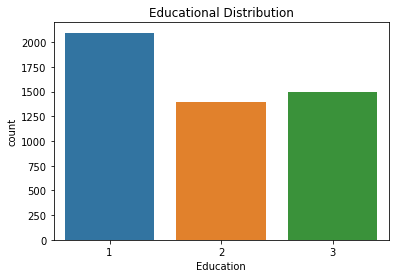

In [121]:
sns.countplot(df["edu"])
plt.title("Educational Distribution")
plt.xlabel("Education")

Observation:
1. observation: 4987
2. Categorical variable type
3. 2095 customer representing 42.00% are undergraduate
4. 1399 customer representing 28.05% are Graduate
5. 1493 customer representing 29.93% are Advance/professionals


### Bivariated  Analysis of the dataset

In [122]:
# Preparing the bivariate dataset for numeric variable
df_bi=df[["age","exp","income","ccavg","mortgage"]]
df_bi.head(3)

,age,exp,income,ccavg,mortgage
0,25,1,49,1.6,0
1,45,19,34,1.5,0
2,39,15,11,1.0,0


In [123]:
# Checking for dispersion
IQR = df_bi.quantile(0.75) - df_bi.quantile(0.25)
display("IQR:",IQR)

'IQR:'

age          20.0
exp          20.0
income       59.0
ccavg         1.9
mortgage    101.0
dtype: float64

In [124]:
# Range
display("Range :",df_bi.max()-df_bi.min())

'Range :'

age          44.0
exp          46.0
income      216.0
ccavg        10.0
mortgage    635.0
dtype: float64

In [125]:
# Variance
display("Variance",df_bi.var().round(2))

'Variance'

age           131.35
exp           131.44
income       2121.77
ccavg           3.06
mortgage    10364.33
dtype: float64

In [126]:
# Coveriance

display("Coveriance",df_bi.cov())

'Coveriance'

,age,exp,income,ccavg,mortgage
age,131.350798,130.638079,-30.037056,-1.052690,-15.184778
exp,130.638079,131.443967,-25.495550,-1.014480,-12.935803
income,-30.037056,-25.495550,2121.774865,52.044136,967.994047
ccavg,-1.052690,-1.014480,52.044136,3.058385,19.435215
mortgage,-15.184778,-12.935803,967.994047,19.435215,10364.327383


In [127]:
#Checking for skewness and Kurtosis
display("Skewness:",df_bi.skew())

'Skewness:'

age        -0.031075
exp        -0.028110
income      0.839704
ccavg       1.595858
mortgage    2.099909
dtype: float64

In [128]:
#Check Kurtosis
display("Kurtosis",df_bi.kurtosis())

'Kurtosis'

age        -1.152700
exp        -1.120848
income     -0.049019
ccavg       2.635593
mortgage    4.736684
dtype: float64

In [129]:
# Correlation

display("Correlation",df_bi.corr())

'Correlation'

,age,exp,income,ccavg,mortgage
age,1.000000,0.994221,-0.056897,-0.052522,-0.013014
exp,0.994221,1.000000,-0.048277,-0.050597,-0.011083
income,-0.056897,-0.048277,1.000000,0.646065,0.206420
ccavg,-0.052522,-0.050597,0.646065,1.000000,0.109162
mortgage,-0.013014,-0.011083,0.206420,0.109162,1.000000


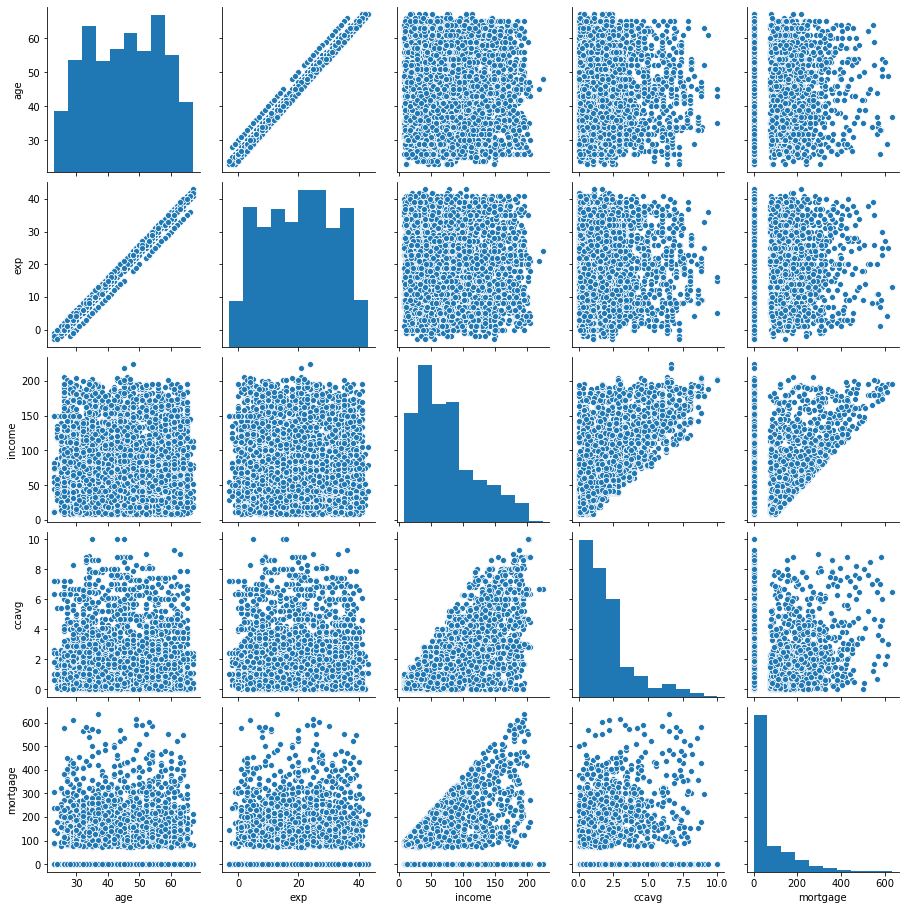

In [130]:
# pair plot for correlation
sns.pairplot(df_bi,)

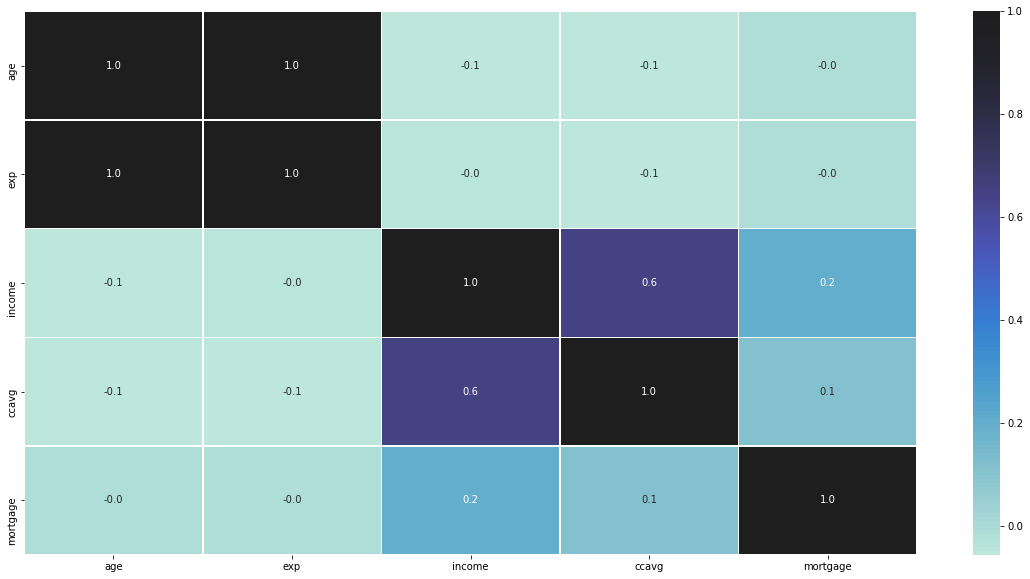

In [131]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap

Observation:
1. "Age" and "Experience" are highly correlated, so we need to drop one of the column


In [132]:
# Dropping Experience Columns
df=df.drop(columns={"exp"},axis = 1)

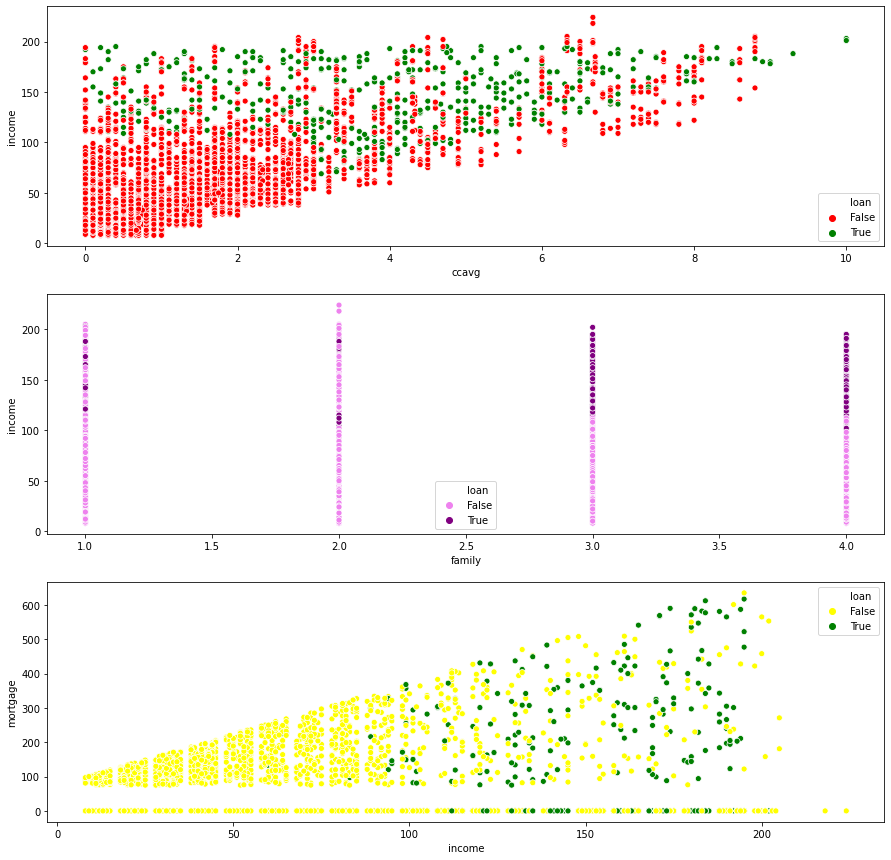

In [134]:
# Influence of few attributes on Personal loan - Dependant variables
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.ccavg, df.income, hue = df['loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(df.family, df.income, hue = df['loan'], palette= ['violet','purple'])

plt.subplot(3,1,3)
sns.scatterplot(df.income, df.mortgage, hue = df['loan'], palette= ['yellow','green'])

cross tabulation can be given as : 
 loan    False  True 
credit              
False    3181    337
True     1326    143
cross tabulation can be given as :  
 loan       False     True 
credit                    
False   0.904207  0.095793
True    0.902655  0.097345


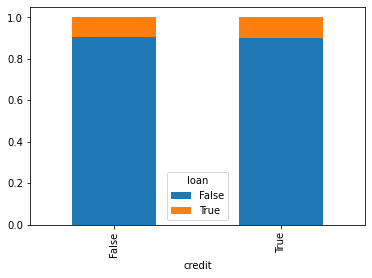

In [135]:

# Let compare the relationship between Credit Card and Personal Loan
credit2=pd.crosstab(df["credit"],df["loan"])
credit2.div(credit2.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print("cross tabulation can be given as :","\n",credit2)
print("cross tabulation can be given as : ","\n",credit2.div(credit2.sum(1).astype(float),axis=0))

Observation: The customer who use or don't use a credit card issued by the Bank do not seem to affect the probabilty of buying a personal loan

cross tabulation can be given as : 
 loan    False  True 
cd_acc              
False    4345    340
True      162    140
cross tabulation can be given as :  
 loan       False     True 
cd_acc                    
False   0.927428  0.072572
True    0.536424  0.463576


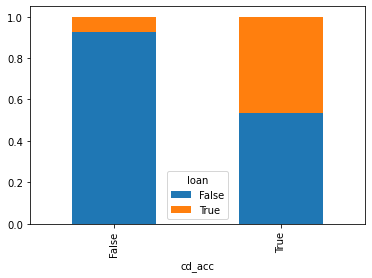

In [136]:
# Let compare the relationship between Credit account and Personal Loan
credit2=pd.crosstab(df["cd_acc"],df["loan"])
credit2.div(credit2.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print("cross tabulation can be given as :","\n",credit2)
print("cross tabulation can be given as : ","\n",credit2.div(credit2.sum(1).astype(float),axis=0))

Observation: The customer with credit account with the bank seem to buy more personal loan from the bank

cross tabulation can be given as : 
 loan    False  True 
online              
False    1825    189
True     2682    291
cross tabulation can be given as :  
 loan       False     True 
online                    
False   0.906157  0.093843
True    0.902119  0.097881


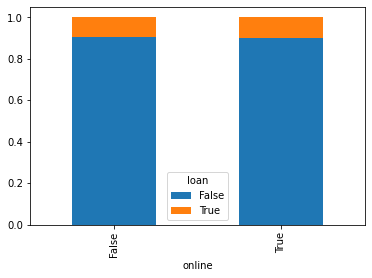

In [137]:

# Let compare the relationship between online banking and Personal Loan
credit2=pd.crosstab(df["online"],df["loan"])
credit2.div(credit2.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print("cross tabulation can be given as :","\n",credit2)
print("cross tabulation can be given as : ","\n",credit2.div(credit2.sum(1).astype(float),axis=0))

observation: The customer who uses or don't use internet banking facilities seem to not affect the probability pf buying personal loan

cross tabulation can be given as : 
 loan     False  True 
sec_acc              
False     4045    420
True       462     60
cross tabulation can be given as :  
 loan        False     True 
sec_acc                    
False    0.905935  0.094065
True     0.885057  0.114943


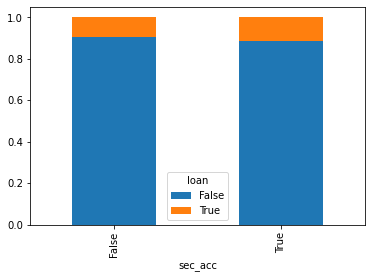

In [138]:

# Let compare the relationship between security and Personal Loan
credit2=pd.crosstab(df["sec_acc"],df["loan"])
credit2.div(credit2.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print("cross tabulation can be given as :","\n",credit2)
print("cross tabulation can be given as : ","\n",credit2.div(credit2.sum(1).astype(float),axis=0))

Observation: Having or not having a security account does not affect the probability of buying a personal loan

cross tabulation can be given as : 
 loan  False  True 
edu               
1      2002     93
2      1217    182
3      1288    205
cross tabulation can be given as :  
 loan     False     True 
edu                     
1     0.955609  0.044391
2     0.869907  0.130093
3     0.862693  0.137307


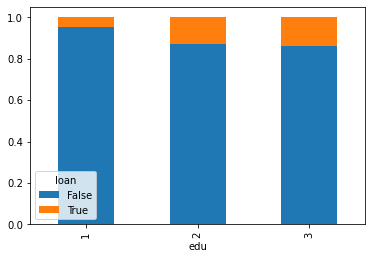

In [139]:

# Let compare the relationship between Education and Personal Loan
credit2=pd.crosstab(df["edu"],df["loan"])
credit2.div(credit2.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print("cross tabulation can be given as :","\n",credit2)
print("cross tabulation can be given as : ","\n",credit2.div(credit2.sum(1).astype(float),axis=0))

Observation: From the plot, we can observe that customers who are more educatd have higher probability of buying personal loan.

cross tabulation can be given as : 
 loan    False  True 
family              
1        1360    107
2        1188    106
3         874    133
4        1085    134
cross tabulation can be given as :  
 loan       False     True 
family                    
1       0.927062  0.072938
2       0.918083  0.081917
3       0.867925  0.132075
4       0.890074  0.109926


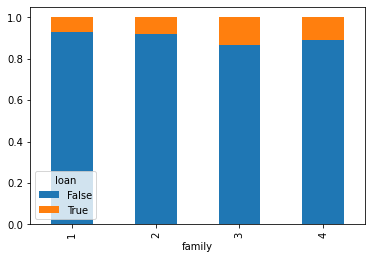

In [140]:

# Let compare the relationship between family and Personal Loan
credit2=pd.crosstab(df["family"],df["loan"])
credit2.div(credit2.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print("cross tabulation can be given as :","\n",credit2)
print("cross tabulation can be given as : ","\n",credit2.div(credit2.sum(1).astype(float),axis=0))

Observation: From the plot, the size of the family does not significantly affect probability

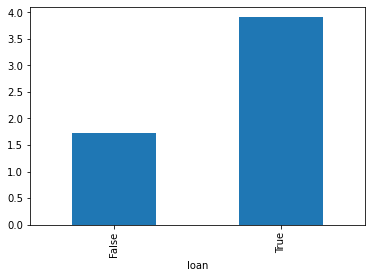

In [141]:
# let's compare Credit card spending with Personal loan
df.groupby("loan")["ccavg"].mean().plot(kind="bar")

Observation: It is observed that applicants who spend more on credit cards are more viable to buy personal loan

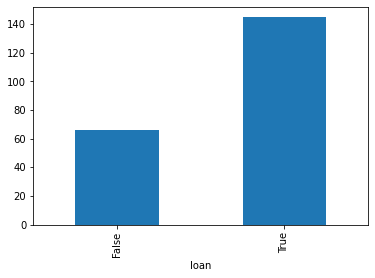

In [142]:
# let's compare Income with Personal loan
df.groupby("loan")["income"].mean().plot(kind="bar")

Observation: it can be seen that customers with high incomes are more feasible to buy the personal loan 

### Get Data Ready for Modeling


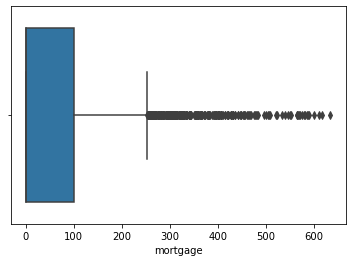

In [144]:
#. Resolve the outliers in mortgage
sns.boxplot(x=df['mortgage']) 

In [145]:
df_copy=df

In [146]:
from scipy import stats
df["mortage_zscore"] = np.abs(stats.zscore(df["mortgage"]))
df=df[df['mortage_zscore']<3]
df

,age,income,family,ccavg,edu,mortgage,loan,sec_acc,cd_acc,online,credit,mortage_zscore
0,25,49,4,1.6,1,0,False,True,False,False,False,0.556471
1,45,34,3,1.5,1,0,False,True,False,False,False,0.556471
2,39,11,1,1.0,1,0,False,False,False,False,False,0.556471
3,35,100,1,2.7,2,0,False,False,False,False,False,0.556471
4,35,45,4,1.0,2,0,False,False,False,False,True,0.556471
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,False,False,False,True,False,0.556471
4996,30,15,4,0.4,1,85,False,False,False,True,False,0.278539
4997,63,24,2,0.3,3,0,False,False,False,False,False,0.556471
4998,65,49,3,0.5,2,0,False,False,False,True,False,0.556471


In [147]:
df.drop('mortage_zscore',axis=1,inplace=True)

In [148]:
df.shape

(4882, 11)

In [149]:
#check for duplicates
df.duplicated().sum()

0

In [150]:
#check for null values
df.isna().sum()

age         0
income      0
family      0
ccavg       0
edu         0
mortgage    0
loan        0
sec_acc     0
cd_acc      0
online      0
credit      0
dtype: int64

In [151]:
#Working on the categorical variables
df1=pd.get_dummies(df.family,prefix="family_size").iloc[:,1:]
df2=pd.get_dummies(df.edu,prefix="edu",drop_first=True)

In [152]:
df1.head(2) #one hot encoding for family category variable

,family_size_2,family_size_3,family_size_4
0,0,0,1
1,0,1,0


In [153]:
df2.head(2) #one hot encoding for education category variable

,edu_2,edu_3
0,0,0
1,0,0


In [154]:
df= pd.concat([df,df1],axis=1)
df= pd.concat([df,df2],axis=1)
df.head(3)

,age,income,family,ccavg,edu,mortgage,loan,sec_acc,cd_acc,online,credit,family_size_2,family_size_3,family_size_4,edu_2,edu_3
0,25,49,4,1.6,1,0,False,True,False,False,False,0,0,1,0,0
1,45,34,3,1.5,1,0,False,True,False,False,False,0,1,0,0,0
2,39,11,1,1.0,1,0,False,False,False,False,False,0,0,0,0,0


In [155]:
# Dropping "Edu" and "family" Categorical variable
df=df.drop(columns={"edu","family"},axis = 1)

In [ ]:
df.columns

In [178]:
print("Shape",df.shape)
print("no of rows",df.shape[0])
print("no of columns",df.shape[1])

Shape (4882, 14)
no of rows 4882
no of columns 14


In [179]:
# Convert boolean to int
df["loan"]=df["loan"].astype("int")
df["sec_acc"]=df["sec_acc"].astype("int")
df["cd_acc"]=df["cd_acc"].astype("int")
df["online"]=df["online"].astype("int")
df["credit"]=df["credit"].astype("int")

In [180]:
df.head(3)

,age,income,ccavg,mortgage,loan,sec_acc,cd_acc,online,credit,family_size_2,family_size_3,family_size_4,edu_2,edu_3
0,25,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
df.tail(3)

,age,income,ccavg,mortgage,loan,sec_acc,cd_acc,online,credit,family_size_2,family_size_3,family_size_4,edu_2,edu_3
4997,63,24,0.3,0,0,0,0,0,0,1,0,0,0,1
4998,65,49,0.5,0,0,0,0,1,0,0,1,0,1,0
4999,28,83,0.8,0,0,0,0,1,1,0,1,0,0,0


In [183]:
X=df.drop("loan",axis=1) 
y=df["loan"]

### Question 3: Split the data into traing and test set in the ratio of 70:30 respectively

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [185]:
print("X_train Shape:",X_train.shape)
print("Y_train Shape:",y_train.shape)
print("X_test Shape:",X_test.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (3417, 13)
Y_train Shape: (3417,)
X_test Shape: (1465, 13)
y_test Shape: (1465,)


Lets confirm the data split

In [186]:
print("{0:0.1f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.1f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.0% data is in training set
30.0% data is in test set


### Question 4: Use Logistic Regression model to predict the number of a customers buying personal loans.print all the metrics related for evaluating the model performance

In [189]:

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train) #fitting the dat

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
#traing our dataset
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train) 
y_pred = log_reg.predict(X_train) 

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-1.48422768e-03,  5.55288281e-02,  1.70154729e-01,
         7.68471424e-04, -1.55952712e+00,  3.58589938e+00,
        -6.86024964e-01, -1.23605492e+00, -2.01558915e-01,
         1.55895168e+00,  1.19316104e+00,  3.45863738e+00,
         3.22509452e+00]])

In [226]:
print("Number of prediction made",y_pred.shape)
print(y_pred)

Number of prediction made (3417,)
[0 0 0 ... 0 0 0]


In [228]:
pred_proba

array([[9.99962786e-01, 3.72144544e-05],
       [9.82771768e-01, 1.72282325e-02],
       [9.95350094e-01, 4.64990569e-03],
       ...,
       [9.98110346e-01, 1.88965425e-03],
       [5.19569361e-01, 4.80430639e-01],
       [9.99938683e-01, 6.13168294e-05]])

observation: 

1.There is a high probability of the Personal loan being a bad loan, because of the zero's in the prediction


###### Evaluating the Model

In [234]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.9593210418495757
The Testing Accuracy is:  0.9610921501706484
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3113
           1       0.88      0.63      0.73       304

    accuracy                           0.96      3417
   macro avg       0.92      0.81      0.86      3417
weighted avg       0.96      0.96      0.96      3417



Observation: 
        
    1. My training accuracy in 3417 observation is 95.93%
    2. My testing accuracy in 1645 observation is 96.10%
    3. From the classification report we can observe the performance of my model using various measurement
    4: Precision : 96%
    5: Recall: 99%
    6. F1-Score: 98% (this the combination of precision and recall)
    

In [214]:

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

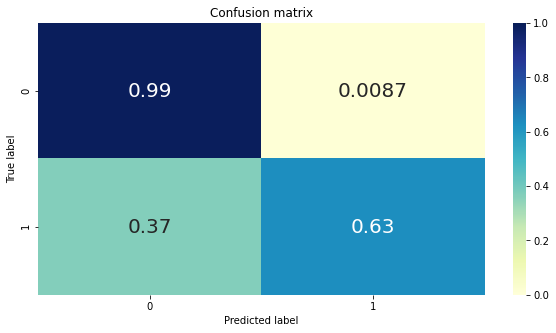

In [236]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plt.figure(figsize=(10,5))
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

Observation:
1. In my True Negative (TN): I have predicted that 3086 customer would most likely not buy Personal Loan and I have been correct 99% and I have been .09% incorrect (FP, type I error), that is about 27 customers

2. True Positive: I have predicted that 192 customers would buy the loan and I have been accurate 63% but I have been in correct 37% (False Negative, type II error), that is about 112 customer.

3. My model based on the confusion matrix classification her performed good, but there is need to improve on my True Positive, so that Loan would not be issue to customer that would default.


In [197]:
log_reg.classes_

array([0, 1])

In [198]:
cm_norm

array([[0.99132669, 0.00867331],
       [0.36842105, 0.63157895]])

In [199]:
cm

array([[3086,   27],
       [ 112,  192]], dtype=int64)

In [200]:
cm.sum(axis=0)

array([3198,  219], dtype=int64)

In [201]:
np.diag(cm)

array([3086,  192], dtype=int64)

In [240]:

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)



print()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)

# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


The True Positive Rate is: [0.99132669 0.63157895]
The Precision is: [0.96497811 0.87671233]
The False positive rate is: [0.36842105 0.00867331]
The False Negative Rate is:  [0.00867331 0.36842105]

The average TPR is: 0.8114528209376637
The average Precision is: 0.920845220043349
The average False positive rate is: 0.1885471790623362
The average False Negative Rate is: 0.1885471790623362


Observation:

1. From the model our True Positive rate or Sensitivity, the model was able  predict 99% of customer that would default when issued Personal Loan and 65% of Customer that would not default when Isuued Personal loan. The average of the True positive rate is at 81%

2. For Precision, out of the total precision of defaulter Predict, 96% was corrected and out of the total of liability customer that would get the loan we made, we are 87% correct, The average of our model Precision is at 92%

3. For the False Positive rate, the model has been able to predict 36% False Positive, this are valid customer that we did  not capture and also False negative of 1% False nagativ. The avergare false postive rate is at 18%. The object of the model is to get this value as low as possible

4. The False Negative rate is the same as the False postive rate, the value are just reversed


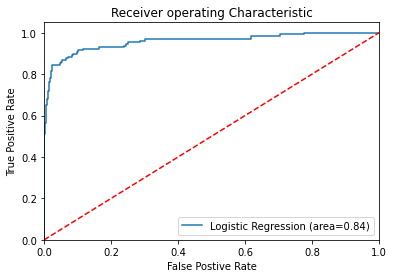

In [247]:
#AUC ROC Curve, area under the curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc= roc_auc_score(y_test,log_reg.predict(X_test))
fpr,tpr,thresholds = roc_curve(y_test,log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression (area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("Receiver operating Characteristic")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig('Log_Roc')
plt.show()

Observation:
1. From the ROC curve we can see that our model is performing better as the area under the curve is 84%
2. The True Positive reate is higher than the false postive rate


In [204]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.11210015194739682
The Log Loss on Testing Dataset is:  0.11059714220694374


Observation:

1. Using the log-loss Evaluation measure we are able to get: 11.21% of our Training data and 11.06% for our testing data.

The loss loss in an error detection metric, which defined as the negative likehood for the true label given a probabillistic classifier prediction. 

The model is better because, it threshold are higher and it ensure we do not give out bad loans



### Question 5: Give your reasoning on how can the model perform better?

In [205]:
# Hyper parameter tunning - using  Parameter Grid

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [208]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 359 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1622 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3039 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 20.3min finished


In [209]:
best_clf.best_estimator_

LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

###### Check Accuracy

In [248]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.963


Reason: How our model although doing well can still perform better by using the GridSearchCV for tunning our model.
    
    The advangtage of this is that it would run through different options, and then selecting the best Parameter such as 
    
    1. The penalty to apply
    2. The solver to implement
    3. Also perform various alterations.
    4. The GridSearchCV was able to perfrom over 4800 fits and was able to predict the best model to achieve our accuracy.
    5. Random State: 10, Solver = 'liblinear', Panalty = L2
    6. By using the GridSearch to tunne our model we were able to get 96% Accuracy in our result.

### Question 6: Business Understanding of your model?

1. With the model performance at 96% accuracy we can comfortable deploy to any banking infreastructure. This would assist the bank to know a liability customer that would not defect on a Personal loan.

2.  The Model is able to Trap most of the True Negative, hence protecting the bank from potential risk of lose of fund to bad customer.

3.  With the abilty to analyse the features that effect a good and bad loan, this can help the business to understand it's environment. Hereby being able to educate their client on what to do, in order to increase there chances of obtaining a Personal loan from the bank.

4. The model can be deployed on mobile apps. so that it is readly available for clients and customer, to know if they meet the requirement of securing personal loan from the bank, hereby saving sufficient man hour and cost that would have been wasted in processing time.

5. The model would improve the rating and ranking of the bank among its competitors